##  Data Cleaning Notes
1. Data with unusual symbols like "\\" corrected
2. Made caps similar for similar data
3. amount columns has many null values we assumed here that amount is missing denoted by 0 
4. Missing values are removed except subvertical 

##  importing libraries

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import streamlit as st
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('startup_funding_Excel.xlsx')
df

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,2989,2015-01-02,LensKart,NaN,NaN,NaN,"TPG Growth, TR Capital, IDG Ventures",Private Equity,17.627850
1,2990,2015-01-02,VioletStreet,NaN,NaN,NaN,"Venkat Vallabhneni, Sudhakar Reddy, Srinivasa ...",Seed Funding,2.582685
2,2991,2015-01-05,Lookup,NaN,NaN,NaN,"DeNA Co., Japan & Teruhide Sato (in Addition t...",Seed Funding,3.115620
3,2992,2015-01-05,#Fame,NaN,NaN,NaN,TO THE NEW Ventures,Private Equity,81.990000
4,2993,2015-01-05,Gympik,NaN,NaN,NaN,"Tom Clausen, Rohan Ajila, Haldyn Glass",Seed Funding,1.106865
...,...,...,...,...,...,...,...,...,...
3036,0,2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.800000
3037,2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.524293
3038,6,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.850000
3039,1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,65.988782


In [5]:
df['city']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3036    Bengaluru
3037    Bengaluru
3038      Gurgaon
3039      Gurgaon
3040      Chennai
Name: city, Length: 3041, dtype: object

In [6]:
df.loc[2997,'round'] = 'Crowd Funding'

In [7]:
df['amount'] = round(df['amount'],2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        3041 non-null   int64         
 1   date         3041 non-null   datetime64[ns]
 2   startup      3041 non-null   object        
 3   vertical     2870 non-null   object        
 4   subvertical  2107 non-null   object        
 5   city         2861 non-null   object        
 6   investors    3017 non-null   object        
 7   round        3037 non-null   object        
 8   amount       3041 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 213.9+ KB


In [9]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2833 entries, 167 to 3040
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        2833 non-null   int64         
 1   date         2833 non-null   datetime64[ns]
 2   startup      2833 non-null   object        
 3   vertical     2833 non-null   object        
 4   subvertical  2079 non-null   object        
 5   city         2833 non-null   object        
 6   investors    2833 non-null   object        
 7   round        2833 non-null   object        
 8   amount       2833 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 221.3+ KB


In [11]:
df

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
167,2810,2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
168,2811,2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
170,2813,2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
171,2814,2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
172,2815,2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...,...,...
3036,0,2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
3037,2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
3038,6,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85
3039,1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,65.99


In [12]:
df.drop('Sr No', axis=1, inplace=True)

C:\Users\kkark\AppData\Local\Temp\ipykernel_8732\1636448745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Sr No', axis=1, inplace=True)


In [13]:
df.set_index('date',inplace=True)

In [14]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


## Exporting cleaned file 

In [15]:
df.to_csv('cleanedStartupFile.csv')

##  making metrics

In [16]:
df['amount'].sum()
df['amount'].mean()
df['amount'].max()
df['startup'].count()

2833

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2833 entries, 2015-04-03 to 2020-01-13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   startup      2833 non-null   object 
 1   vertical     2833 non-null   object 
 2   subvertical  2079 non-null   object 
 3   city         2833 non-null   object 
 4   investors    2833 non-null   object 
 5   round        2833 non-null   object 
 6   amount       2833 non-null   float64
dtypes: float64(1), object(6)
memory usage: 177.1+ KB


## making plots for overall analysis

In [18]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [19]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


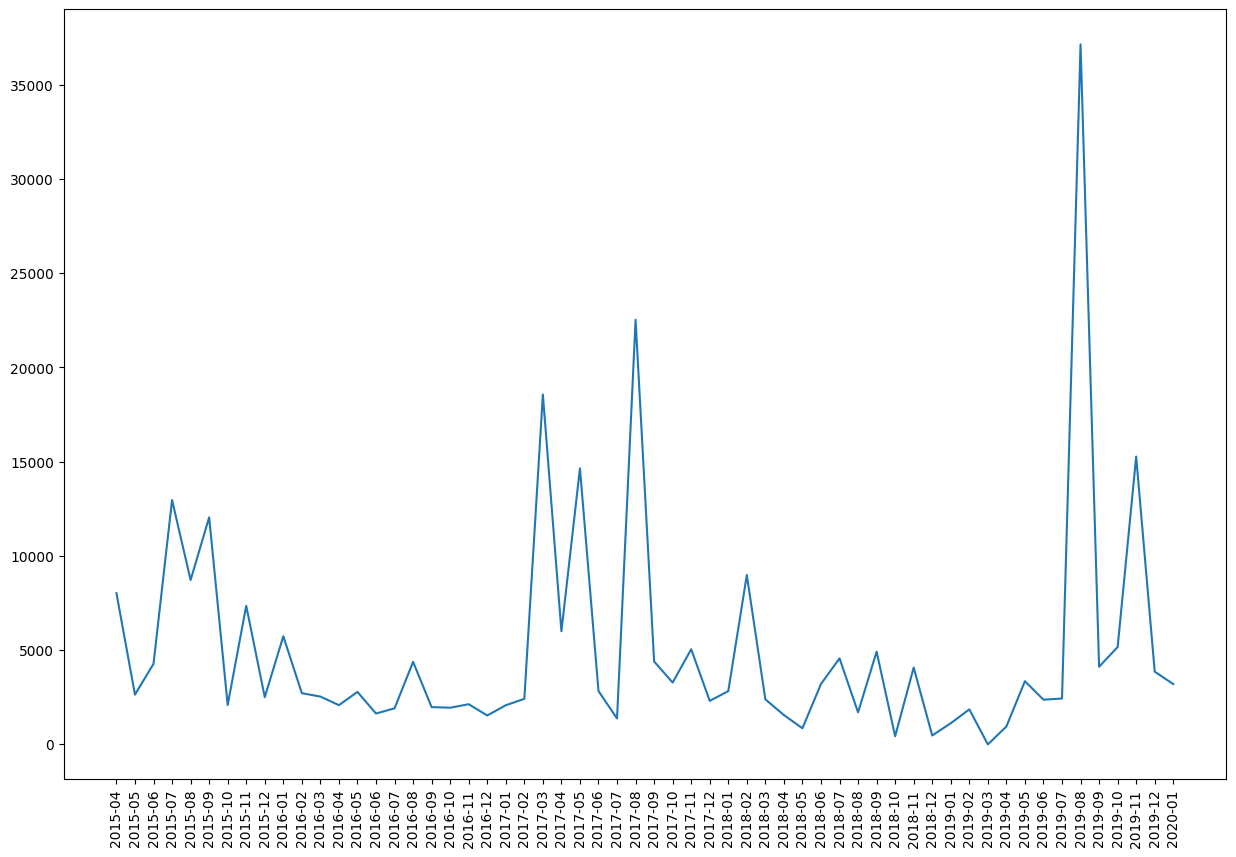

In [20]:
temp_df = df.resample('M')['amount'].sum().to_frame().reset_index()

temp_df['date'] = temp_df['date'].astype('str')
temp_df['date'] = temp_df['date'].str[0:7]

plt.figure(figsize=(15,10))
plt.plot(temp_df['date'], temp_df['amount'])
plt.xticks(rotation=90);

In [21]:
temp_df

,date,amount
0,2015-04,8026.82
1,2015-05,2641.21
2,2015-06,4275.75
3,2015-07,12968.04
4,2015-08,8722.26
5,2015-09,12048.62
6,2015-10,2090.43
7,2015-11,7354.17
8,2015-12,2507.74
9,2016-01,5738.33


In [22]:
temp_df.set_index('date', inplace=True)

In [23]:
df['amount']

date
2015-04-03      16.40
2015-04-04       1.64
2015-04-06       0.98
2015-04-07       1.35
2015-04-07    1229.85
               ...   
2020-01-09    1639.80
2020-01-09     150.52
2020-01-10    1229.85
2020-01-13      65.99
2020-01-13      73.79
Name: amount, Length: 2833, dtype: float64

## count of startups every months


In [24]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [25]:
temp_df2 = df.resample('M')['startup'].count()
temp_df2

date
2015-04-30     61
2015-05-31     57
2015-06-30     84
2015-07-31     97
2015-08-31     98
2015-09-30     87
2015-10-31     93
2015-11-30     89
2015-12-31     88
2016-01-31    104
2016-02-29     99
2016-03-31     84
2016-04-30     77
2016-05-31     79
2016-06-30     97
2016-07-31     63
2016-08-31     87
2016-09-30     73
2016-10-31     80
2016-11-30     72
2016-12-31     72
2017-01-31     72
2017-02-28     48
2017-03-31     71
2017-04-30     71
2017-05-31     67
2017-06-30     65
2017-07-31     42
2017-08-31     45
2017-09-30     58
2017-10-31     53
2017-11-30     50
2017-12-31     42
2018-01-31     36
2018-02-28     41
2018-03-31     33
2018-04-30     32
2018-05-31     22
2018-06-30     32
2018-07-31     34
2018-08-31     21
2018-09-30     12
2018-10-31      7
2018-11-30     18
2018-12-31      7
2019-01-31      3
2019-02-28      3
2019-03-31      0
2019-04-30     14
2019-05-31      9
2019-06-30     13
2019-07-31     13
2019-08-31     16
2019-09-30      9
2019-10-31      3
2019-

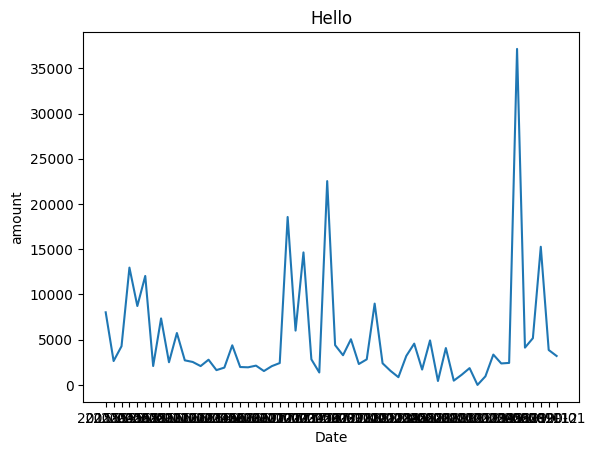

In [26]:
plt.plot(temp_df.index, temp_df['amount'])
plt.title('Hello')
plt.xlabel('Date')
plt.ylabel('amount')
plt.show()

##  pie diagram overall analysis
1. count
2. sum

In [27]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [28]:
temp_df3 = df['vertical'].value_counts().head(7)
temp_df3

vertical
Consumer Internet    929
Technology           475
E-Commerce           285
Healthcare            69
Finance               59
Logistics             32
Education             23
Name: count, dtype: int64

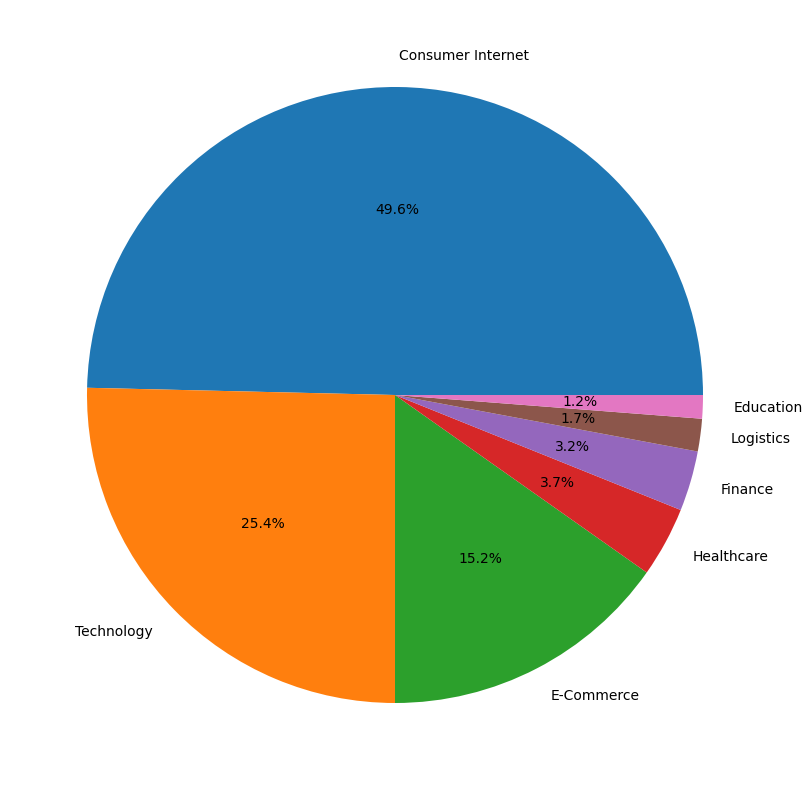

In [29]:
#using matplotlib
plt.figure(figsize =(15,10))
plt.pie(temp_df3.values,labels = temp_df3.index, autopct = '%0.1f%%')
plt.show()

In [30]:
temp_df4 = df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head()
temp_df4

vertical
E-Commerce           66938.63
Consumer Internet    51216.06
Transportation       32112.48
Technology           17327.51
Finance              11171.88
Name: amount, dtype: float64

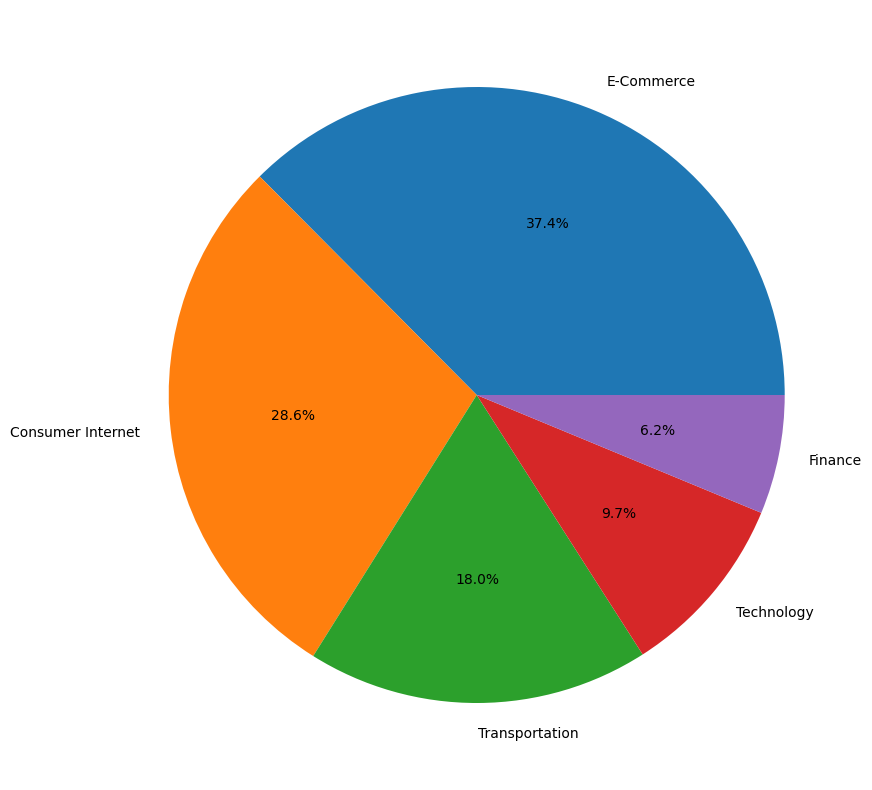

In [31]:
plt.figure(figsize =(15,10))
plt.pie(temp_df4.values,labels = temp_df4.index, autopct = '%0.1f%%')
plt.show()

In [32]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [33]:
funding_types = sorted(df['round'].unique())
funding_types

['Angel',
 'Angel Funding',
 'Angel Round',
 'Bridge Round',
 'Corporate Round',
 'Crowd Funding',
 'Debt',
 'Debt Funding',
 'Debt and Preference capital',
 'Equity',
 'Equity Based Funding',
 'Funding Round',
 'Inhouse Funding',
 'Maiden Round',
 'Mezzanine',
 'Pre Series A',
 'Private',
 'Private Equity',
 'Private Equity Round',
 'Private Funding',
 'Seed',
 'Seed Funding',
 'Seed Round',
 'Seed funding',
 'Seed/Angel Funding',
 'Series A',
 'Series B',
 'Series B (Extension)',
 'Series C',
 'Series D',
 'Series E',
 'Series F',
 'Series G',
 'Series H',
 'Series J',
 'Single Venture',
 'Structured Debt',
 'Term Loan',
 'Venture',
 'Venture - Series Unknown',
 'Venture Round']

In [34]:
pd.Series(funding_types, name='Types of Funding')

0                           Angel
1                   Angel Funding
2                     Angel Round
3                    Bridge Round
4                 Corporate Round
5                   Crowd Funding
6                            Debt
7                    Debt Funding
8     Debt and Preference capital
9                          Equity
10           Equity Based Funding
11                  Funding Round
12                Inhouse Funding
13                   Maiden Round
14                      Mezzanine
15                   Pre Series A
16                        Private
17                 Private Equity
18           Private Equity Round
19                Private Funding
20                           Seed
21                   Seed Funding
22                     Seed Round
23                   Seed funding
24             Seed/Angel Funding
25                       Series A
26                       Series B
27           Series B (Extension)
28                       Series C
29            

### top investor

In [35]:
max_amount = df['amount'].max()
max_amount

31976.1

In [36]:
top_investor = (df[df['amount'] == max_amount][['investors','amount']]).set_index('investors')
top_investor

,amount
investors,
Westbridge Capital,31976.1


## Top 10 city wise funding

In [37]:
df['city']

date
2015-04-03    Bengaluru
2015-04-04      Gurgaon
2015-04-06    New Delhi
2015-04-07    Hyderabad
2015-04-07       Mumbai
                ...    
2020-01-09    Bengaluru
2020-01-09    Bengaluru
2020-01-10      Gurgaon
2020-01-13      Gurgaon
2020-01-13      Chennai
Name: city, Length: 2833, dtype: object

<BarContainer object of 10 artists>

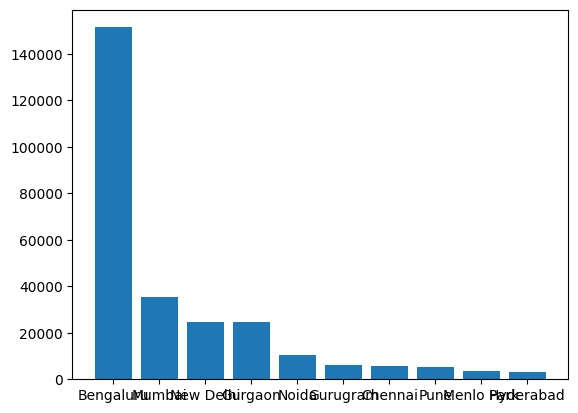

In [38]:
temp_df5 = df.groupby('city')['amount'].sum().sort_values(ascending=False).head(10)
plt.bar(temp_df5.index, temp_df5.values)

<BarContainer object of 10 artists>

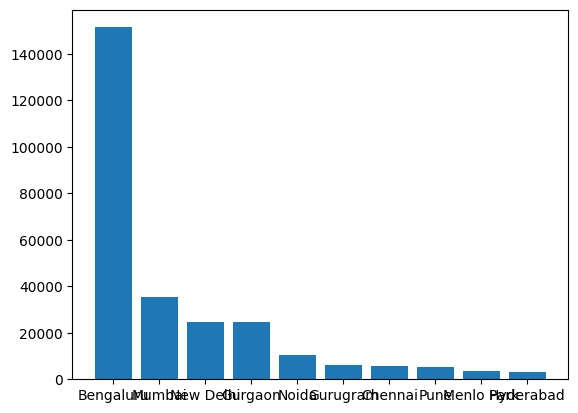

In [39]:
plt.bar(temp_df5.index, temp_df5.values)

## startup list

In [40]:
# related industry

In [41]:
startup_list = pd.Series(df[df['startup'] == '1mg']['vertical'].unique(), name='Vertical')
startup_list

0    Online Pharmacy & Drug DB
1                   E-Commerce
2            Consumer Internet
Name: Vertical, dtype: object

In [42]:
startup_list[startup_list.notnull()]

0    Online Pharmacy & Drug DB
1                   E-Commerce
2            Consumer Internet
Name: Vertical, dtype: object

In [43]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [44]:
startup_list = pd.Series(df[df['startup'] == '1mg']['vertical'].unique(), name='Vertical')
startup_list

0    Online Pharmacy & Drug DB
1                   E-Commerce
2            Consumer Internet
Name: Vertical, dtype: object

In [45]:
dates = pd.Series(df[df['startup'] == 'Swiggy'].index.date, name='Date').sort_values()
dates

0    2015-04-03
1    2015-05-06
2    2015-06-09
3    2016-01-19
4    2016-05-10
5    2016-09-19
6    2017-05-30
7    2018-02-07
Name: Date, dtype: object

## invseted amount

In [46]:
round(df[df['startup'] == 'Swiggy']['amount'].sum(),2)

2217.81

In [47]:
lst = []

for i in df['investors'].str.split(', '):
    if len(i)>1:
        for j in i:
            if j not in lst:
                lst.append(j)

    else:
        lst.append(i[0])

set(lst)

{'Peyush Bansal',
 'HR Technology fund',
 'Steadview Capital',
 'Leo Wang Sangeeth Ram',
 'Mahesh Murthy',
 'Times Internet,Matrix Partners',
 'Surojit Chatterjee',
 'Zodius Technology Opportunities Fund',
 'Sashi Reddy',
 'Alok Srivastava',
 'Praveer Kumar',
 'The Chennai Angels',
 'TPG Growth',
 'hooting Starts Sports LLP',
 'Times Group Brand Capital',
 'Bharat Gupta',
 'Digital Currency Group',
 'China Lodging Group',
 'Aprameya',
 'Dheeraj Mehta & Others',
 'Delhivery',
 'India Quotient',
 'Frontline Strategy',
 'M George Oommen',
 'Mr. Manoj Prasad',
 'Aditya Vij',
 'Subhkam Ventures and Mohit Khadaria',
 'Anurag Srivastava',
 'Palaash Ventures',
 'Undisclosed',
 'Zeta',
 'Unternehmertum Venture Capital',
 'Harsh Kundra',
 'Zain Raj',
 'Dr. Ritesh Malik',
 'Axiata Digital',
 'Vellayan Subbiah',
 'Bessemer Venture Partners',
 'Vipul Gautam',
 'Yeahmobi',
 'Somerset Indus Capital Ventures',
 'Mr. Sudhir & Ms. Shalini Sethi',
 'Rajesh Balpande',
 'Raju Reddy',
 'Quadria Capital Advi

In [48]:
list(lst).sort()

In [49]:
sorted(list(lst))

[' Sandeep Aggarwal',
 '& Others',
 '& other Angel investors.',
 '021 Capita',
 '100 Co-founders Lab and others.',
 '122 West Ventures',
 '1Crowd',
 '1Crowd',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3ONE4 Capital Advisors',
 '3One4 Capital',
 '3one4 Capital',
 '3one4 Capital Advisors LLP',
 '3one4 capital',
 '500 Start-Ups',
 '500 Startups',
 '500 Startups',
 '500 Startups',
 '500 Startups',
 '500 Startups & Other HNIs',
 '50K Ventures',
 '50K Ventures',
 '50K Ventures',
 '50K Ventures & others',
 '50k Ventures',
 '91SpringBoard',
 '91maker.com',
 '91springboard',
 'A M Sikander',
 'A91 Partners',
 'AB Kinnevik',
 'ABB Technology Ventures',
 'ABCOM Investments',
 'ABI-Showatech (India) Ltd',
 'ABM Knowledgeware',
 'ADAG Reliance Private Equity',
 'AECAL',
 'AET Fund',
 'AJ Ventures and Jain International Trade Organisation (JITO)',
 'AL Nour International Holdings and Mark V Investments',
 'ANI

In [50]:
df['round'].sample(50)

date
2016-04-19        Private Equity
2016-04-18        Private Equity
2015-05-13          Seed Funding
2016-04-29          Seed Funding
2015-07-02        Private Equity
2017-12-11    Seed/Angel Funding
2016-09-21          Seed Funding
2017-10-09          Seed Funding
2016-09-06        Private Equity
2015-09-15          Seed Funding
2015-10-29          Seed Funding
2016-03-16          Seed Funding
2017-09-14        Private Equity
2016-08-24        Private Equity
2016-07-18          Seed Funding
2015-06-24        Private Equity
2019-05-28              Series C
2016-08-16        Private Equity
2017-04-11          Seed Funding
2017-08-02          Seed Funding
2016-08-23          Seed Funding
2017-01-18          Seed Funding
2017-01-23          Seed Funding
2015-06-20        Private Equity
2015-09-15          Seed Funding
2015-08-06        Private Equity
2016-07-05          Seed Funding
2018-02-14        Private Equity
2017-12-07          Debt Funding
2016-06-07        Private Equity
2018-

In [51]:
pd.Series(round(df[df['startup'] == '1mg']['amount'].sum(),2), name='Amount')

0    377.14
Name: Amount, dtype: float64

In [52]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [53]:
 df['investors'].str.split(', ')

date
2015-04-03                      [Accel Partners, SAIF Partners]
2015-04-04                  [Rudy Gopalakrishnan, ah! Ventures]
2015-04-06    [Rajesh Sawheny , Rajan Anandan, Amit Ranjan, ...
2015-04-07               [Amit Tyagi, Sandeep Acharya & others]
2015-04-07    [Tiger Global, Investment AB Kinnevik, Steadvi...
                                    ...                        
2020-01-09                            [Tiger Global Management]
2020-01-09                              [Sequoia Capital India]
2020-01-10                                      [Ant Financial]
2020-01-13                          [Susquehanna Growth Equity]
2020-01-13                                  [Chiratae Ventures]
Name: investors, Length: 2833, dtype: object

In [94]:
investor_list = []

for i in df['investors'].str.split(', '):
    if len(i)>1:
        for j in i:
            if j not in investor_list:
                investor_list.append(j)
    else:
        investor_list.append(i[0])

investor_list = set(investor_list)

In [107]:
s ={1,2,3}
for i in s:
    print(i)

1
2
3


In [114]:
investor_list[0] in df['investors'].iloc[0]

False

In [113]:
df['investors'].iloc[0]

'Accel Partners, SAIF Partners'

In [116]:
investor_list2= []
for i  in range(len(investor_list)):
    for j in range(df.shape[0]):

        if investor_list[i] in df['investors'].iloc[i]:
            print(investor_list[i])
            if df['amount'].iloc[i] !=0:
                investor_list2.append(investor_list[i])

IDG Venture


IndexError: single positional indexer is out-of-bounds

In [102]:
my_str = 'My name is Nisha'
'Nisha' in my_str

True

In [56]:
df[df['investors'].str.contains('Accel Partner')]

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-08,Olacabs,Cab Aggregator,NaN,Bengaluru,"DST Global, Steadview Capital, Tiger Global, A...",Private Equity,3279.60
2015-04-13,ZopNow,Online Grocer,NaN,Bengaluru,"Dragoneer Investment, Accel Partners, Qualcomm...",Private Equity,81.99
2015-04-13,Capricoast,Online Kitchen Furniture,NaN,Bengaluru,Accel Partners India,Seed Funding,10.25
2015-04-16,UrbanClap,Hyperlocal Mobile Services Marketplace,NaN,New Delhi,"SAIF Partners, Accel Partners, Kunal Bahl, Roh...",Seed Funding,13.12
...,...,...,...,...,...,...,...
2018-06-26,Sigtuple,Healthcare,Data Driven Intelligence Solutions Platform,Bengaluru,"Accel Partners, IDG Venture, Endiya Partners, ...",Private Equity,155.78
2018-07-30,Cure Fit,Consumer Internet,Health and fitness Platform,Bengaluru,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity,983.88
2018-08-08,Metro Bikes,Consumer Internet,Online Bike Rental Marketplace,Bengaluru,"Sequoia Capital India Advisors, Accel Partners...",Private Equity,100.03


In [57]:
df['investors'].values

array(['Accel Partners, SAIF Partners',
       'Rudy Gopalakrishnan, ah! Ventures',
       'Rajesh Sawheny , Rajan Anandan, Amit Ranjan, Niraj Singh, AECAL, MeraEvents.',
       ..., 'Ant Financial', 'Susquehanna Growth Equity',
       'Chiratae Ventures'], dtype=object)

In [58]:
df = df.replace(['Accel Partners India', 'Accel Partner', 'Accel Partners'], 'Accel Partners', regex=True)
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partnerss, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [59]:
df = df.replace(['Accel Partnerss'], 'Accel Partners', regex=True)

## largest 5 investments

In [60]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [61]:
filtered_df = df[df['investors'].str.contains('Sequoia Capital India')]
filtered_df =filtered_df.sort_values(by='amount', ascending=False)[['startup','amount']].head()
filtered_df.drop_duplicates()

,startup,amount
date,,
2017-09-07,OYO Rooms,2049.75
2017-08-23,Dhruva,655.92
2019-07-11,Moglix,491.94
2016-11-02,FreshDesk,450.94


Text(0, 0.5, 'amount in crores')

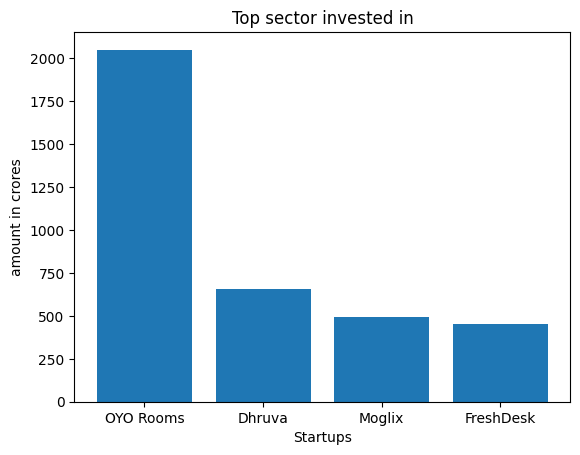

In [62]:
plt.bar(filtered_df['startup'], filtered_df['amount'])
plt.title('Top sector invested in')
plt.xlabel('Startups')
plt.ylabel('amount in crores')

## top sector invested in

In [63]:
filtered_df = df[df['investors'].str.contains('Sequoia Capital India')]
filtered_df = filtered_df.drop_duplicates()
filtered_df = filtered_df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head()
filtered_df

vertical
Consumer Internet    5183.40
Technology            680.52
E-Commerce            590.33
E-commerce            150.52
Logistics Tech        120.36
Name: amount, dtype: float64

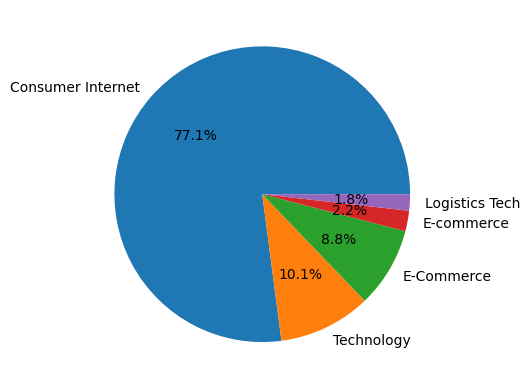

In [64]:
plt.pie(filtered_df.values, labels=filtered_df.index, autopct='%0.1f%%');

## stagewise funding

In [65]:
filtered_df = df[df['investors'].str.contains('Sequoia Capital India')]
filtered_df = filtered_df.sort_values(by='amount', ascending=False)[['round','amount']]
filtered_df = filtered_df.drop_duplicates()
filtered_df = filtered_df.groupby('round')['amount'].sum()
filtered_df = filtered_df[filtered_df.values != 0.00]
filtered_df

round
Private Equity     3919.11
Private Funding     120.36
Series B            150.52
Series D            491.94
Name: amount, dtype: float64

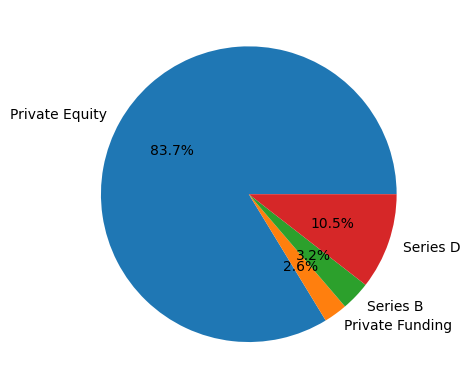

In [66]:
plt.pie(filtered_df.values, labels=filtered_df.index, autopct='%0.1f%%');

## citywise fundings

In [67]:
filtered_df = df[df['investors'].str.contains('Sequoia Capital India')]
filtered_df = filtered_df.sort_values(by='amount', ascending=False)[['city','amount']]
filtered_df = filtered_df.drop_duplicates()
filtered_df = filtered_df.groupby('city')['amount'].sum()
filtered_df = filtered_df[filtered_df.values != 0.00].head()
filtered_df

city
Bengaluru     801.35
Chennai       450.94
Gurgaon      2148.14
Hyderabad      57.39
Mumbai        118.89
Name: amount, dtype: float64

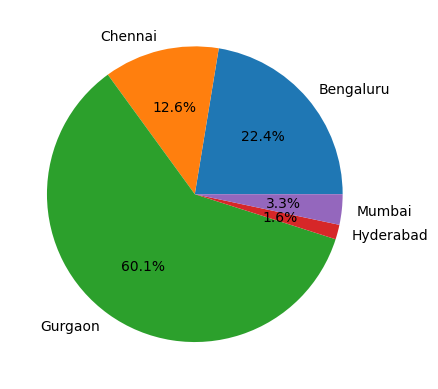

In [68]:
plt.pie(filtered_df.values, labels=filtered_df.index, autopct='%0.1f%%');


## year on year investment

In [69]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [70]:
df[df['startup'].str.contains('Prototyze')]

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,


In [71]:
df[df['vertical'] =='E-commerce']

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2018-01-05,WOTU,E-commerce,Food and Beverages,Bengaluru,"Claris Capital, Mumbai Angels Network",Seed/Angel Funding,0.00
2018-01-08,DAAKI,E-commerce,Sports Nutrition Supplement E-Tailer,Bengaluru,Rohan Agila,Seed/Angel Funding,0.00
2018-01-10,Appario Retail Pvt Ltd.,E-commerce,Retail,Delhi,Amazon-Patni JV,Private Equity,154.47
2018-01-23,Milkbasket,E-commerce,Online Grocery,Gurugram,Unilever Ventures,Private Equity,24.60
2019-04-10,Kabadiwala,E-commerce,Waste Management,Bhopal,"Unilever, Beehive Capital Advisor, ABCOM Inves...",Private Equity,3.53
2019-04-10,Craftsvilla,E-commerce,Fashion and Apparel,Mumbai,Supera Pte Ltd,Inhouse Funding,20.03
2019-04-12,Medlife,E-commerce,Online Medicine,Bengaluru,Prasid Uno Family Trust,Private Equity,139.38
2019-04-19,My Healthcare,E-commerce,Software Solutions,Bengaluru/Gurugram,Sixth Sense Ventures,Series A,24.60
2019-04-19,KrazyBee,E-commerce,Lending Platform,Bengaluru,"BAC Acquisitions, Unifi AIF, BRD Securities, N...",Debt,0.00


In [72]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85


In [73]:
lst = [1,2,3,4,5,"kk",6,7,8,'NK']

In [79]:
for i in lst:
    try:
        pass
        i+1

    except:
        print(i)
        pass

kk
NK


In [82]:
df

,startup,vertical,subvertical,city,investors,round,amount
date,,,,,,,
2015-04-03,Swiggy,Online Food Delivery,NaN,Bengaluru,"Accel Partners, SAIF Partners",Private Equity,16.40
2015-04-04,Bluegape,Web Content Publishing,NaN,Gurgaon,"Rudy Gopalakrishnan, ah! Ventures",Seed Funding,1.64
2015-04-06,InstaLively,Video Streaming,NaN,New Delhi,"Rajesh Sawheny , Rajan Anandan, Amit Ranjan, N...",Seed Funding,0.98
2015-04-07,Pricejugaad,Price Comparison,NaN,Hyderabad,"Amit Tyagi, Sandeep Acharya & others",Seed Funding,1.35
2015-04-07,Quikr,Online Classifieds,NaN,Mumbai,"Tiger Global, Investment AB Kinnevik, Steadvie...",Private Equity,1229.85
...,...,...,...,...,...,...,...
2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1639.80
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.52
2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1229.85
